<a href="https://colab.research.google.com/github/bythyag/machine-learning-projects/blob/main/rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 5.8 MB/s eta 0:00:00


In [28]:
import pandas as pd

url = 'https://raw.githubusercontent.com/amankharwal/Website-data/refs/heads/master/weatherAUS.csv' #load dataset :)
df = pd.read_csv(url)

In [29]:
df.shape #142193 rows, 24 columns

(142193, 24)

In [30]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [31]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

In [33]:
dir_to_deg = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5,
    'E': 90, 'ESE': 112.5, 'SE': 135, 'SSE': 157.5,
    'S': 180, 'SSW': 202.5, 'SW': 225, 'WSW': 247.5,
    'W': 270, 'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

df['WindDir9am'] = df['WindDir9am'].map(dir_to_deg)
df['WindDir3pm'] = df['WindDir3pm'].map(dir_to_deg)
df['WindGustDir'] = df['WindGustDir'].map(dir_to_deg)
df['RainToday'] = df['RainToday'].map({'No': 0, 'Yes': 1})
df['RainTomorrow'] = df['RainTomorrow'].map({'No': 0, 'Yes': 1})

In [34]:
df['Date'] = pd.to_datetime(df['Date'])

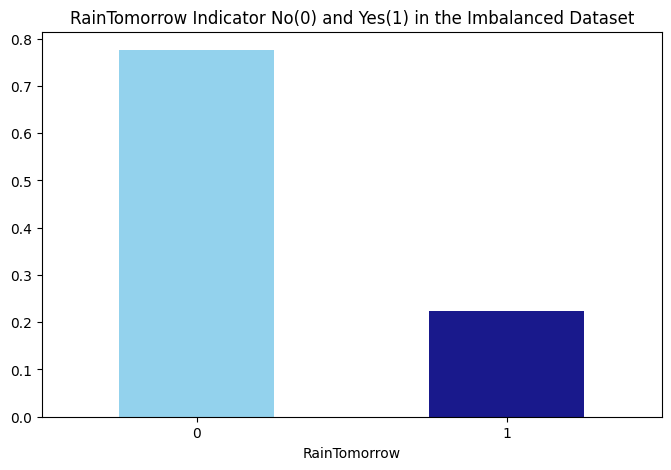

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

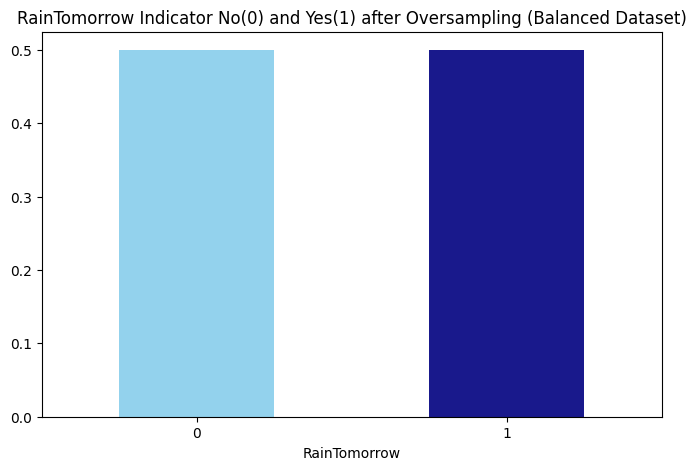

In [36]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]

yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
df = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
df.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

<Axes: >

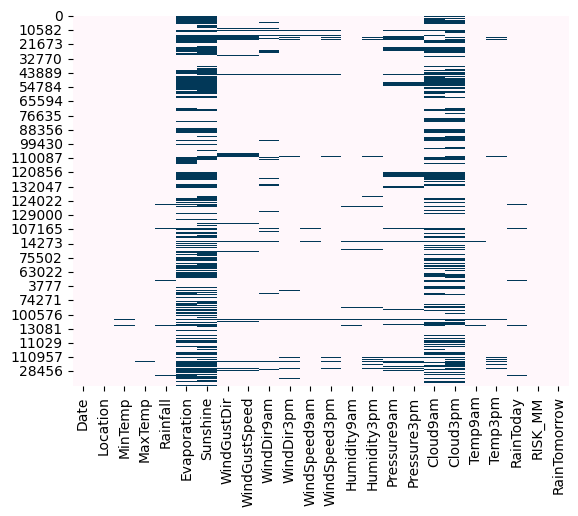

In [37]:
import seaborn as sns
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [38]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing.head(4)

,Total,Percent
Sunshine,104831,0.475140
Evaporation,95411,0.432444
Cloud3pm,85614,0.388040
Cloud9am,81339,0.368664


In [39]:
for col in ["Sunshine", "Evaporation", "Cloud3pm", "Cloud9am"]:
    unique_vals = df[col].dropna().unique()
    print(f"{col} — {len(unique_vals)} unique values")
    print(f"Sample: {sorted(unique_vals)[:10]}")
    print()

#Sunshine, Evaporation are Continous, Cloud3pm and Cloud9am are Categorical

Sunshine — 145 unique values
Sample: [np.float64(0.0), np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9)]

Evaporation — 356 unique values
Sample: [np.float64(0.0), np.float64(0.1), np.float64(0.2), np.float64(0.3), np.float64(0.4), np.float64(0.5), np.float64(0.6), np.float64(0.7), np.float64(0.8), np.float64(0.9)]

Cloud3pm — 10 unique values
Sample: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]

Cloud9am — 10 unique values
Sample: [np.float64(0.0), np.float64(1.0), np.float64(2.0), np.float64(3.0), np.float64(4.0), np.float64(5.0), np.float64(6.0), np.float64(7.0), np.float64(8.0), np.float64(9.0)]



In [40]:
df["Cloud3pm"].value_counts() #apparently 9.0 is outlier

,count
Cloud3pm,
7.0,34124
8.0,29306
1.0,16895
6.0,14276
5.0,10091
3.0,9029
2.0,8669
4.0,7588
0.0,5039


In [41]:
# Median Imputer for continuous features
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df[["Sunshine", "Evaporation"]] = median_imputer.fit_transform(df[["Sunshine", "Evaporation"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["Cloud3pm", "Cloud9am"]] = mode_imputer.fit_transform(df[["Cloud3pm", "Cloud9am"]])

In [42]:
numeric_cols = df.select_dtypes(include=['float64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Keep only rows within 1.5 * IQR for all numeric columns
df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

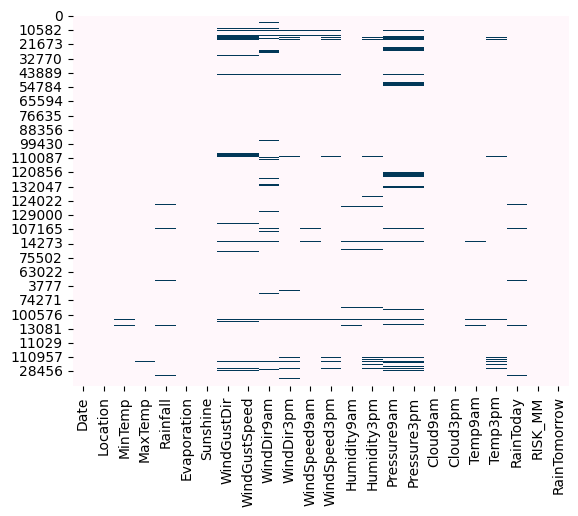

In [43]:
sns.heatmap(df.isnull(), cbar=False, cmap='PuBu')

In [44]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1082
MaxTemp,471
Rainfall,3124
Evaporation,0
Sunshine,0
WindGustDir,15491
WindGustSpeed,15354
WindDir9am,14728


In [45]:
# Median Imputer for continuous features
from sklearn.impute import SimpleImputer
median_imputer = SimpleImputer(strategy='median')
df[["Pressure9am", "Pressure3pm"]] = median_imputer.fit_transform(df[["Pressure9am", "Pressure3pm"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["WindGustDir", "WindDir9am", "WindDir3pm"]] = mode_imputer.fit_transform(df[["WindGustDir", "WindDir9am", "WindDir3pm"]])

In [46]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1082
MaxTemp,471
Rainfall,3124
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,15354
WindDir9am,0


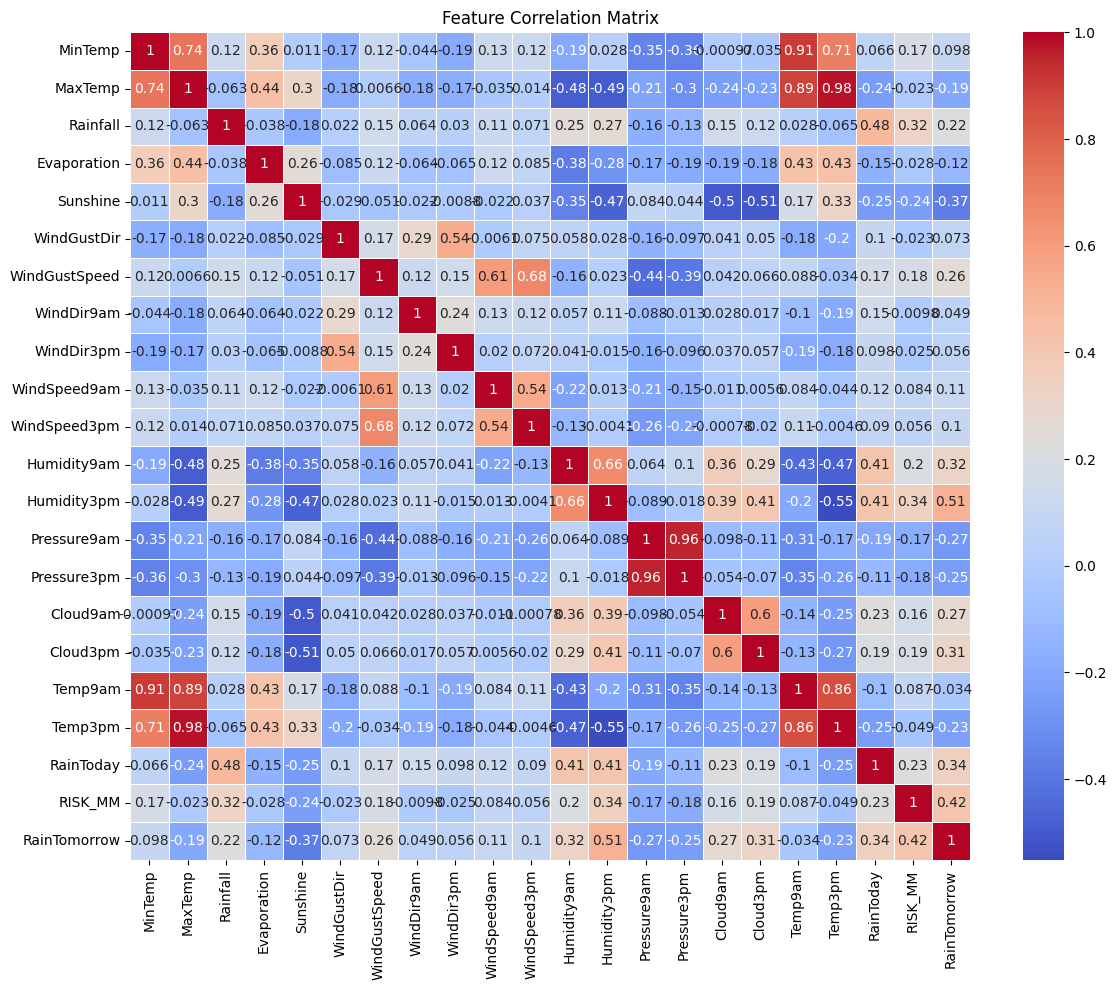

In [47]:
plt.figure(figsize=(12, 10))
correlation = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [48]:
# Median Imputer for continuous features
median_imputer = SimpleImputer(strategy='median')
df[["RISK_MM", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "WindGustSpeed"]] = median_imputer.fit_transform(df[["RISK_MM", "Cloud9am", "Cloud3pm", "Humidity9am", "Humidity3pm", "Rainfall", "WindGustSpeed"]])

# Mode Imputer for categorical/discrete features
mode_imputer = SimpleImputer(strategy='most_frequent')
df[["RainToday"]] = mode_imputer.fit_transform(df[["RainToday"]])

In [49]:
df.dropna(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213147 entries, 0 to 26599
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           213147 non-null  datetime64[ns]
 1   Location       213147 non-null  object        
 2   MinTemp        213147 non-null  float64       
 3   MaxTemp        213147 non-null  float64       
 4   Rainfall       213147 non-null  float64       
 5   Evaporation    213147 non-null  float64       
 6   Sunshine       213147 non-null  float64       
 7   WindGustDir    213147 non-null  float64       
 8   WindGustSpeed  213147 non-null  float64       
 9   WindDir9am     213147 non-null  float64       
 10  WindDir3pm     213147 non-null  float64       
 11  WindSpeed9am   213147 non-null  float64       
 12  WindSpeed3pm   213147 non-null  float64       
 13  Humidity9am    213147 non-null  float64       
 14  Humidity3pm    213147 non-null  float64       
 15  Pressu

In [52]:
from sklearn.preprocessing import MinMaxScaler

# Define the columns that are continuous and suitable for MinMax scaling
continuous_cols = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
    'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
    'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Pressure3pm',
    'Cloud9am', 'Cloud3pm',
    'Temp9am', 'Temp3pm',
    'RISK_MM'
]

# Initialize scaler
scaler = MinMaxScaler()

df[continuous_cols] = scaler.fit_transform(df[continuous_cols])

In [53]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,0.516509,0.523629,0.001617,0.051044,0.468966,270.0,0.294574,270.0,...,0.22,0.449587,0.4800,0.888889,0.777778,0.508439,0.522073,0.0,0.000000,0
1,2008-12-02,Albury,0.375000,0.565217,0.000000,0.051044,0.468966,292.5,0.294574,337.5,...,0.25,0.497521,0.4912,0.777778,0.777778,0.514768,0.570058,0.0,0.000000,0
2,2008-12-03,Albury,0.504717,0.576560,0.000000,0.051044,0.468966,247.5,0.310078,270.0,...,0.30,0.447934,0.5056,0.777778,0.222222,0.594937,0.548944,0.0,0.000000,0
3,2008-12-04,Albury,0.417453,0.620038,0.000000,0.051044,0.468966,45.0,0.139535,135.0,...,0.16,0.613223,0.5712,0.777778,0.777778,0.533755,0.612284,0.0,0.002695,0
4,2008-12-05,Albury,0.613208,0.701323,0.002695,0.051044,0.468966,270.0,0.271318,67.5,...,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0.0,0.000539,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130416,2010-06-08,Launceston,0.226415,0.313800,0.001078,0.051044,0.468966,292.5,0.054264,0.0,...,0.98,0.654545,0.5792,0.777778,0.777778,0.236287,0.285988,0.0,0.023720,1
114384,2016-08-08,PearceRAAF,0.426887,0.370510,0.031806,0.051044,0.296552,270.0,0.488372,292.5,...,0.71,0.576860,0.6176,0.888889,0.888889,0.392405,0.345489,1.0,0.014555,1
84962,2009-03-18,Cairns,0.785377,0.686200,0.000000,0.062645,0.234483,135.0,0.325581,157.5,...,0.60,0.464463,0.4656,0.555556,0.666667,0.757384,0.685221,0.0,0.026415,1
54992,2012-08-17,Ballarat,0.299528,0.240076,0.030728,0.051044,0.468966,225.0,0.441860,337.5,...,0.93,0.276033,0.3488,0.888889,0.888889,0.248945,0.234165,1.0,0.049596,1


In [54]:
features = df[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir',
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
                       'RainToday']]
target = df['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

In [55]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, roc_curve, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def plot_roc_cur(fper, tper):
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

def run_model(model_name, model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("--------SUMMARY--------")
    print("-----------------------")
    print("Model = {}".format(model_name))
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    fper, tper, thresholds = roc_curve(y_test, probs)
    plot_roc_cur(fper, tper)

    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test,
                                               cmap=plt.cm.Blues,
                                               normalize='all')
    disp.plot()
    plt.show()
    print("--------END--------")

    return model, accuracy, roc_auc, coh_kap, time_taken

--------SUMMARY--------
-----------------------
Model = Logistic Regression
Accuracy = 0.7783136599921181
ROC Area under Curve = 0.7782707247499371
Cohen's Kappa = 0.5565868200811968
Time taken = 80.73499011993408
              precision    recall  f1-score   support

           0    0.77195   0.79197   0.78183     26727
           1    0.78505   0.76457   0.77468     26560

    accuracy                        0.77831     53287
   macro avg    0.77850   0.77827   0.77826     53287
weighted avg    0.77848   0.77831   0.77827     53287



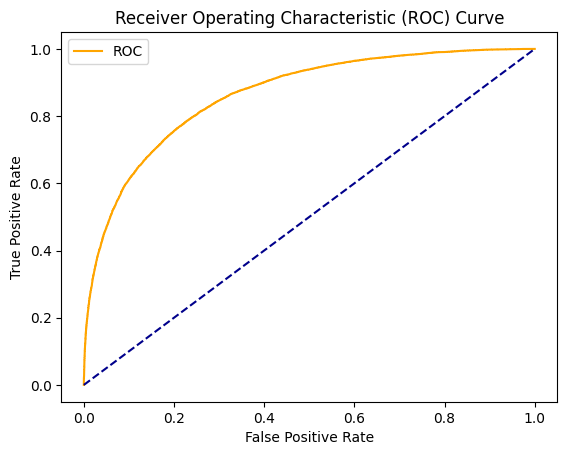

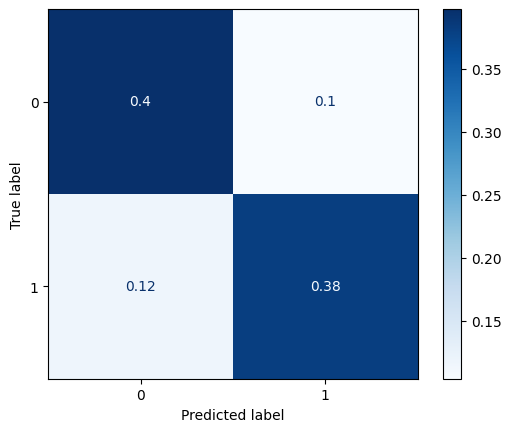

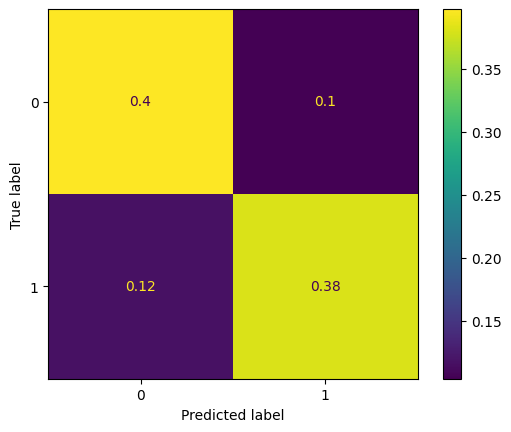

--------END--------
--------SUMMARY--------
-----------------------
Model = Decision Tree
Accuracy = 0.8328673034698895
ROC Area under Curve = 0.8329209467514237
Cohen's Kappa = 0.6657682797185556
Time taken = 0.5379054546356201
              precision    recall  f1-score   support

           0    0.84554   0.81580   0.83041     26727
           1    0.82098   0.85004   0.83526     26560

    accuracy                        0.83287     53287
   macro avg    0.83326   0.83292   0.83283     53287
weighted avg    0.83330   0.83287   0.83282     53287



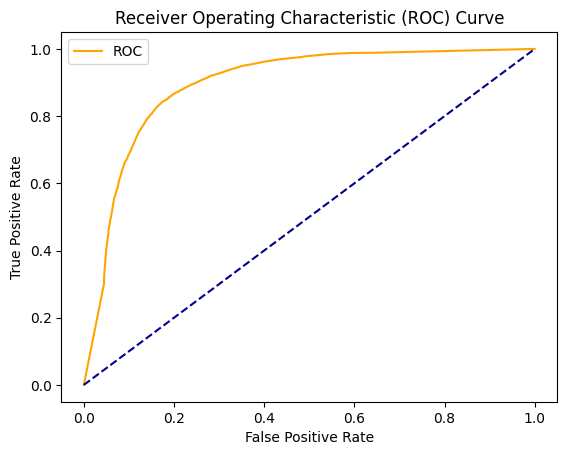

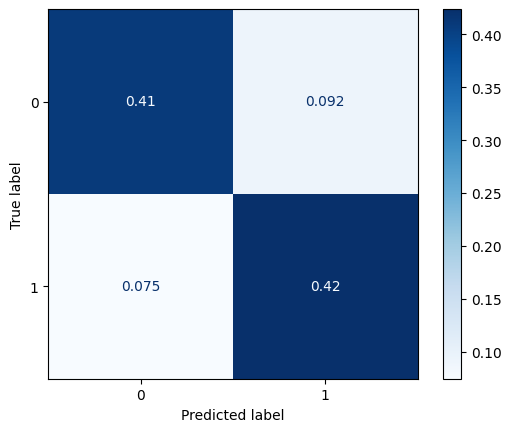

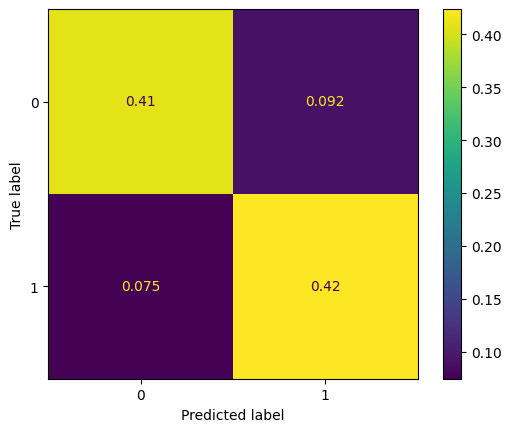

--------END--------
--------SUMMARY--------
-----------------------
Model = Random Forest Classifier
Accuracy = 0.8910616097734907
ROC Area under Curve = 0.8911330570345135
Cohen's Kappa = 0.7821526749610872
Time taken = 40.682785511016846
              precision    recall  f1-score   support

           0    0.91033   0.86834   0.88884     26727
           1    0.87339   0.91393   0.89320     26560

    accuracy                        0.89106     53287
   macro avg    0.89186   0.89113   0.89102     53287
weighted avg    0.89192   0.89106   0.89101     53287



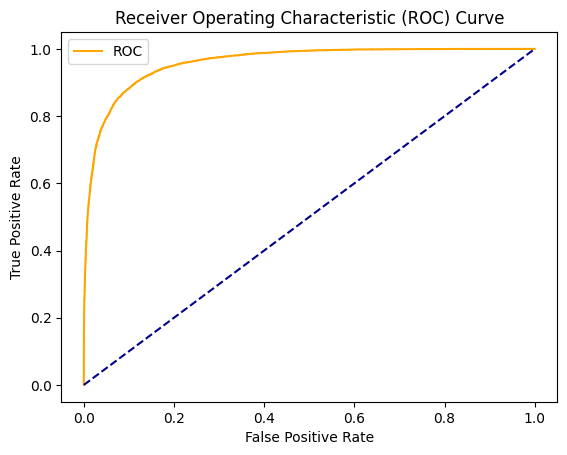

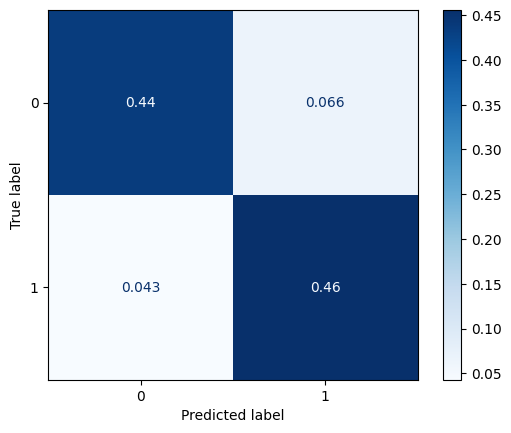

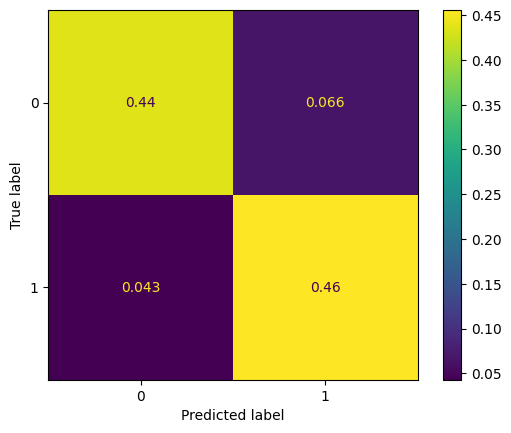

--------END--------
[LightGBM] [Info] Number of positive: 79604, number of negative: 80256
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2588
[LightGBM] [Info] Number of data points in the train set: 159860, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.497961 -> initscore=-0.008157
[LightGBM] [Info] Start training from score -0.008157
--------SUMMARY--------
-----------------------
Model = LGB Classifier
Accuracy = 0.8312721676956857
ROC Area under Curve = 0.8312882133822077
Cohen's Kappa = 0.6625529685316716
Time taken = 8.250349044799805
              precision    recall  f1-score   support

           0    0.83558   0.82617   0.83085     26727
           1    0.82704   0.83641   0.83170     26560

    accuracy                        0.83127     

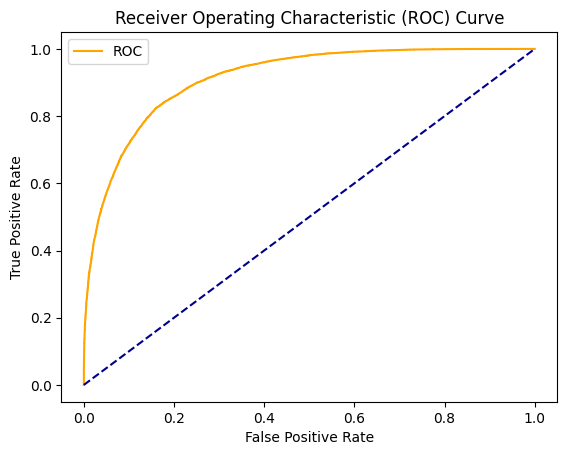

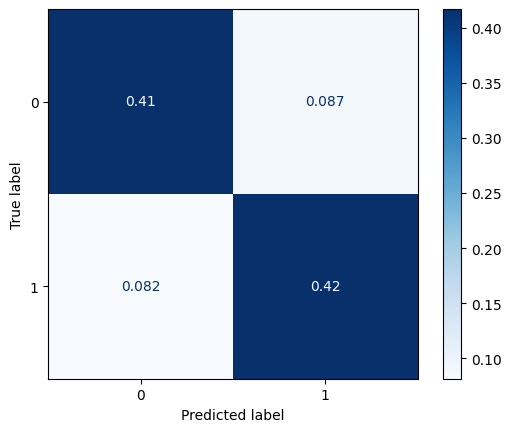

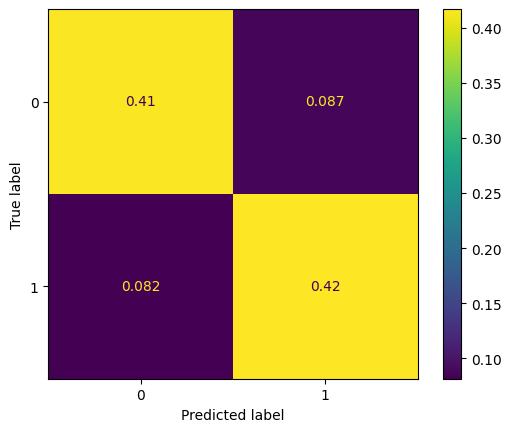

--------END--------
--------SUMMARY--------
-----------------------
Model = CAT Boost Classifier
Accuracy = 0.9230018578640193
ROC Area under Curve = 0.9231371375895319
Cohen's Kappa = 0.8460440902847004
Time taken = 161.8225498199463
              precision    recall  f1-score   support

           0    0.96334   0.87997   0.91977     26727
           1    0.88889   0.96630   0.92598     26560

    accuracy                        0.92300     53287
   macro avg    0.92612   0.92314   0.92288     53287
weighted avg    0.92623   0.92300   0.92287     53287



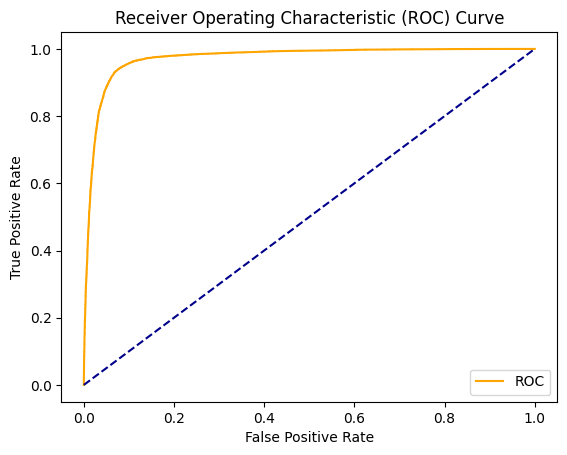

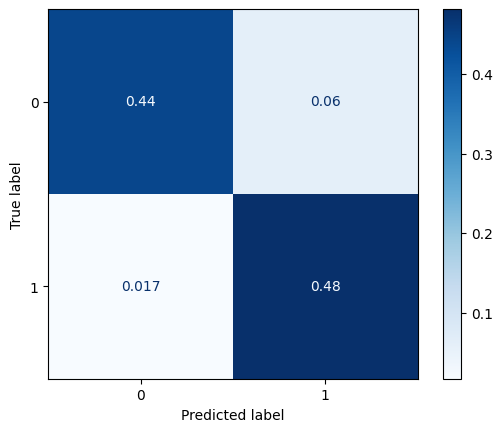

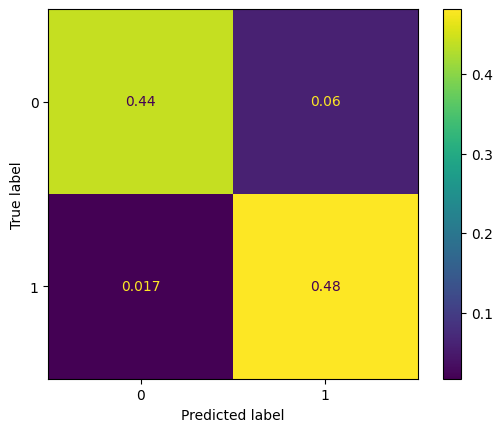

--------END--------
--------SUMMARY--------
-----------------------
Model = XGBoost Classifier
Accuracy = 0.9434008294706026
ROC Area under Curve = 0.9434986099972907
Cohen's Kappa = 0.8868228060045887
Time taken = 31.048992395401
              precision    recall  f1-score   support

           0    0.97318   0.91230   0.94176     26727
           1    0.91697   0.97470   0.94496     26560

    accuracy                        0.94340     53287
   macro avg    0.94508   0.94350   0.94336     53287
weighted avg    0.94516   0.94340   0.94335     53287



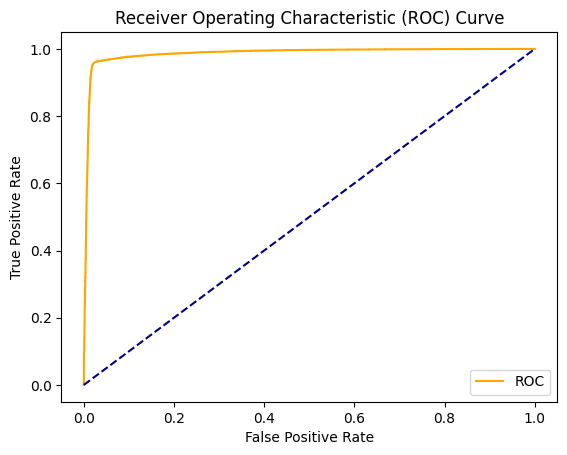

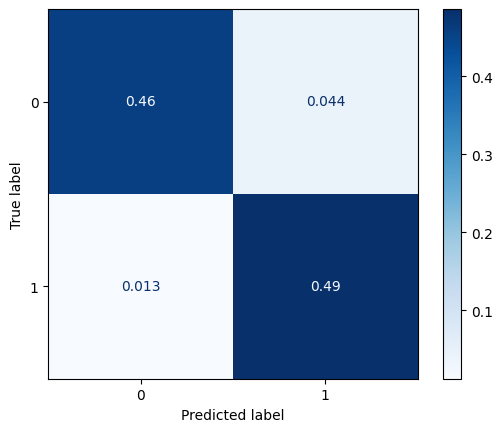

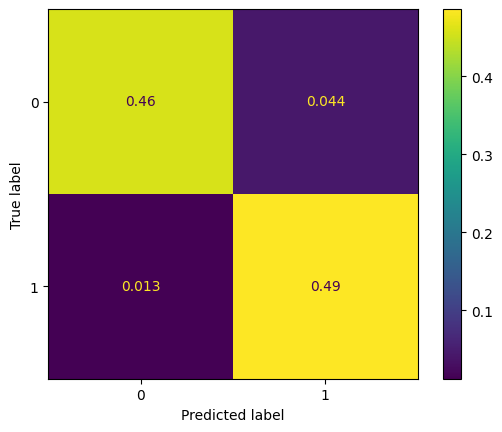

--------END--------


In [56]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model("Logistic Regression",model_lr, X_train, y_train, X_test, y_test)

# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model("Decision Tree", model_dt, X_train, y_train, X_test, y_test)

# Neural Network
# from sklearn.neural_network import MLPClassifier

# params_nn = {'hidden_layer_sizes': (30,30,30),
#              'activation': 'logistic',
#              'solver': 'lbfgs',
#              'max_iter': 500}

# model_nn = MLPClassifier(**params_nn)
# model_nn, accuracy_nn, roc_auc_nn, coh_kap_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model("Random Forest Classifier",model_rf, X_train, y_train, X_test, y_test)

# Light GBM
import lightgbm as lgb
params_lgb ={'colsample_bytree': 0.95,
         'max_depth': 16,
         'min_split_gain': 0.1,
         'n_estimators': 200,
         'num_leaves': 50,
         'reg_alpha': 1.2,
         'reg_lambda': 1.2,
         'subsample': 0.95,
         'subsample_freq': 20}

model_lgb = lgb.LGBMClassifier(**params_lgb)
model_lgb, accuracy_lgb, roc_auc_lgb, coh_kap_lgb, tt_lgb = run_model("LGB Classifier", model_lgb, X_train, y_train, X_test, y_test)

# Catboost

import catboost as cb
params_cb ={'iterations': 50,
            'max_depth': 16}

model_cb = cb.CatBoostClassifier(**params_cb)
model_cb, accuracy_cb, roc_auc_cb, coh_kap_cb, tt_cb = run_model("CAT Boost Classifier",model_cb, X_train, y_train, X_test, y_test, verbose=False)

# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model("XGBoost Classifier", model_xgb, X_train, y_train, X_test, y_test)


<ipython-input-57-99872b995112>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')


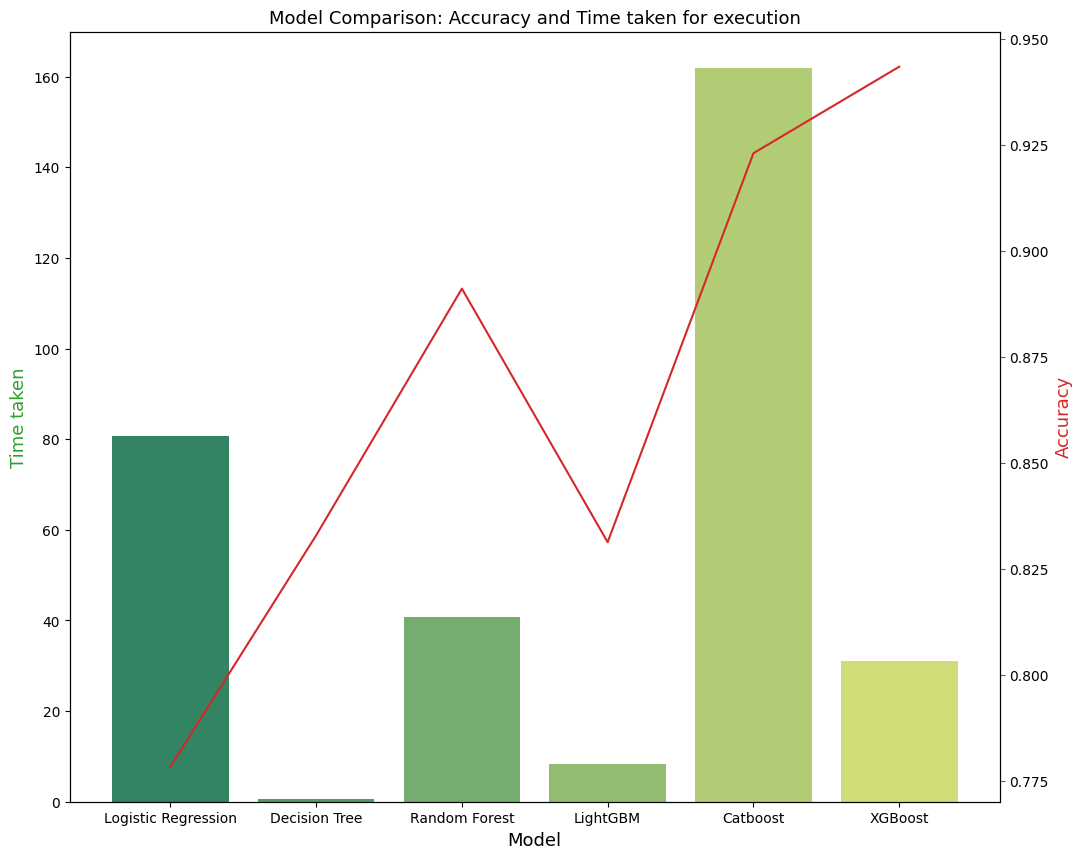

In [57]:
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_lgb, accuracy_cb, accuracy_xgb] #accuracy_nn
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_lgb, roc_auc_cb, roc_auc_xgb] #roc_auc_nn,
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_lgb, coh_kap_cb, coh_kap_xgb] #coh_kap_nn
tt = [tt_lr, tt_dt, tt_rf, tt_lgb, tt_cb, tt_xgb] #tt_nn

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','LightGBM','Catboost','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt} #'Neural Network'
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)